<a href="https://colab.research.google.com/github/jelal1cam/CAMSIF/blob/main/03_Exercise_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`.

In [45]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# Load data
df_tfl = pd.read_csv('/content/drive/MyDrive/Data Science Coursework/Exercises/tfl_ridership.csv')

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [48]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [49]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

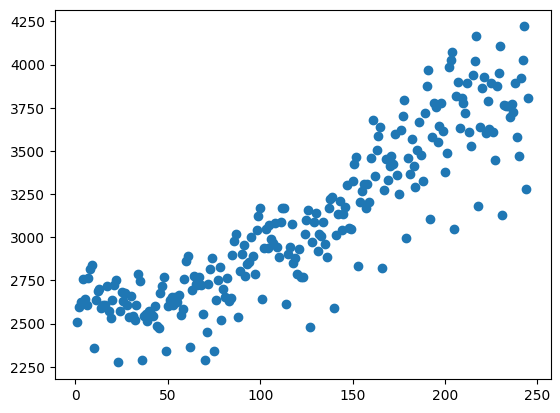

In [50]:
#Your code for scatterplot here
plt.scatter(xvals, yvals)

## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares.
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

In [51]:
def polyreg(data_matrix, k):
    def residual(X, y, beta):
        return y - X @ beta

    def sse(X, y, beta):
        return np.sum(residual(X, y, beta)**2)

    k = min(len(data_matrix) - 1, k)

    data_x, data_y = np.swapaxes(data_matrix, 0, 1)

    X = np.vstack([data_x**i for i in range(k + 1)]).T

    beta = np.linalg.inv(X.T @ X) @ X.T @ data_y

    sse_0 = np.sum((data_y - np.mean(data_y))**2)

    return beta, 1 - sse(X, data_y, beta) / sse_0, residual(X, data_y, beta)

def polyreg_predict(x, beta):
    X_new = np.vstack([x**i for i in range(len(beta))]).T

    return X_new @ beta

beta_0: 2367.382, beta_1: 5.939
MSE: 45323.636, R^2: 0.796


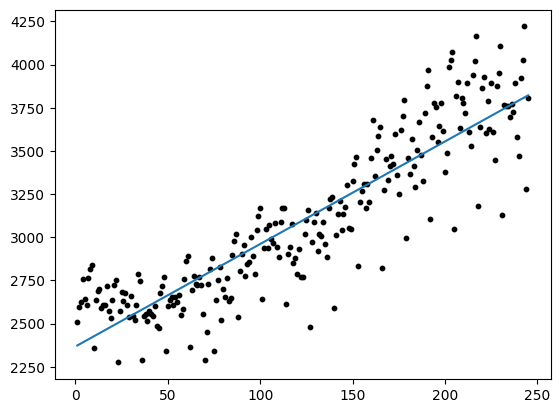

In [52]:
#Your code here
beta, r2, res = polyreg(np.swapaxes(np.array((xvals, yvals)), 0, 1), 1)
print(f'beta_0: {beta[0]:.3f}, beta_1: {beta[1]:.3f}')

pred_lin = polyreg_predict(xvals, beta)
plt.plot(xvals, polyreg_predict(xvals, beta))
plt.scatter(xvals, yvals, c='black', s=10)

print(f'MSE: {np.sum(res.T@res)/len(yvals):.3f}, R^2: {r2:.3f}')

## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

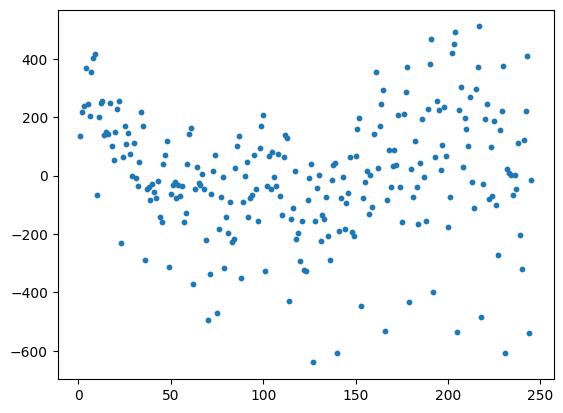

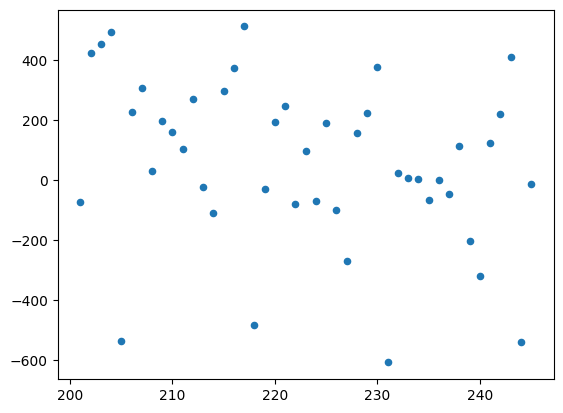

In [53]:
# Your code here
plt.scatter(xvals, res, s=10)
plt.show()

plt.scatter(xvals[200:250], res[200:250], s=20)
plt.show()

< Comment on periodic components here >
From pure inspection of the plot of residuals over a short duration, I was not able to discern any periodic components.

### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum.


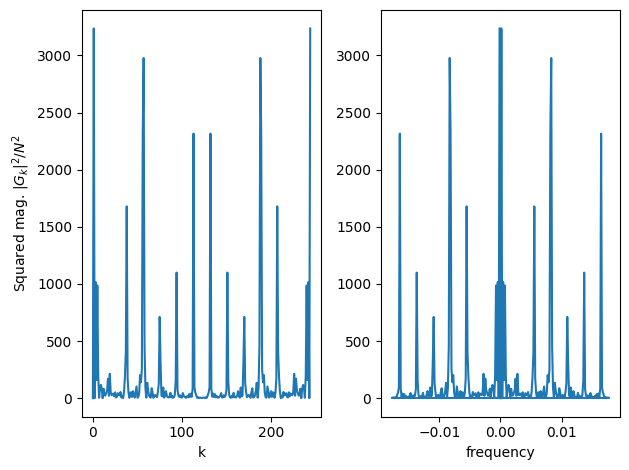

In [54]:
# Your code to compute and plot the periodogram
T = 28

periodogram = np.abs(np.fft.fft(res, N)/N) ** 2
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = np.fft.fftfreq(N)/T
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, periodogram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')

plt.subplot(122)
plt.plot(freqs_in_hz, periodogram)
plt.xlabel('frequency')
plt.tight_layout()

In [55]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
exceeding_indices = indices[(periodogram > 0.5 * np.max(periodogram))]
exceeding_freqs_hz = freqs_in_hz[(periodogram > 0.5 * np.max(periodogram))]

# Need to remove the  N - k frequencies
exceeding_indices = exceeding_indices[:len(exceeding_indices)//2]
exceeding_freqs_hz = exceeding_freqs_hz[:len(exceeding_freqs_hz)//2]

print('Indices for which the periodogram value exceeds 50% of the maximum:', exceeding_indices)
print('Frequencies (in Hz) for which the periodogram value exceeds 50% of the maximum:', exceeding_freqs_hz)

Indices for which the periodogram value exceeds 50% of the maximum: [  1.  38.  56.  57. 113.]
Frequencies (in Hz) for which the periodogram value exceeds 50% of the maximum: [0.00014577 0.00553936 0.00816327 0.00830904 0.0164723 ]


In [59]:
beta, r2, res_dft = fit(np.swapaxes(np.array((xvals, res)), 0, 1), exceeding_freqs_hz)
print('Regression coefficients:', list(map(lambda x: round(x, 3), beta)))
print(f'MSE: {np.sum(res.T@res)/len(yvals):.3f}, R^2: {r2:.3f}')

Regression coefficients: [0.508, -14.859, 139.507, 99.493, 1345.576, 1212.791, -1495.117, -982.745, -30.18, -23.06]
MSE: 45323.636, R^2: 0.239


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares.

All numerical outputs should be displayed to three decimal places.

In [58]:
def fit(data_matrix, freqs):

        def residual(X, y, beta):
          return y - X@beta

        def sse(X, y, beta):
          return np.sum(residual(X, y, beta)**2)

        data_x, data_y = np.swapaxes(data_matrix, 0, 1)

        sincos = (lambda x: np.sin(x), lambda x: np.cos(x))
        X = np.array(list(map(lambda xpt: [f(w*2*np.pi*xpt) for w in freqs for f in sincos], data_x)))

        beta = np.linalg.inv(X.T@X)@X.T@data_y

        res_0 = data_y - np.mean(data_y)*np.ones(data_x.shape[0])
        sse_0 = res_0 @ res_0

        return beta, (1-sse(X, data_y, beta)/sse_0), residual(X, data_y, beta)

def predict(x, beta, freqs):
        sincos = (lambda x: np.sin(x), lambda x: np.cos(x))
        return beta @ np.array(list(map(lambda xpt: [f(w*2*np.pi*xpt) for w in freqs for f in sincos], x))).T

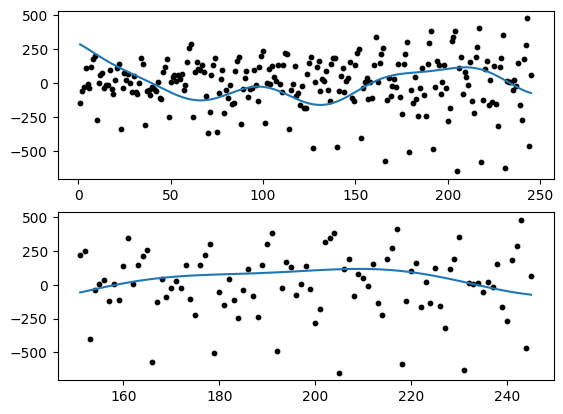

In [70]:
pred_dft = predict(xvals, beta, exceeding_freqs_hz)

plt.subplot(211)
plt.plot(xvals, pred_dft)
plt.scatter(xvals, res, c='black', s=10)
plt.subplot(212)
plt.plot(xvals[150:250], pred_dft[150:250])
plt.scatter(xvals[150:250], res[150:250], c='black', s=10)
plt.show()

### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

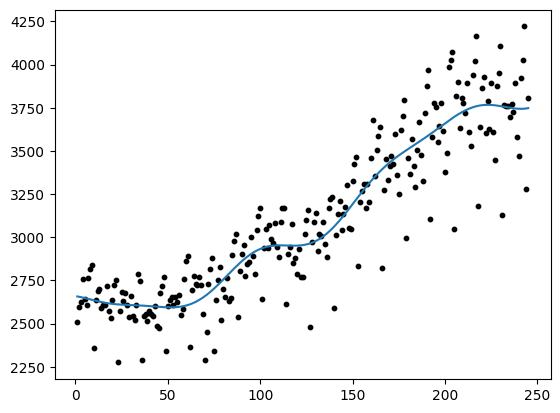

MSE: 34486.801, R^2: 0.844


In [71]:
predictions = pred_lin + pred_dft

plt.plot(xvals, predictions)
plt.scatter(xvals, yvals, c='black', s=10)
plt.show()

res = yvals - predictions
res_0 = yvals - np.mean(yvals)*np.ones(xvals.shape[0])
sse_0 = res_0 @ res_0
print(f'MSE: {np.sum(res.T@res)/len(yvals):.3f}, R^2: {1-np.sum(res@res)/sse_0:.3f}')

The combined fit outperforms the linear one by more effectively mirroring the overall trend. This is evidenced by a notable rise in the R^2 score and drop in the MSE.